In [1]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SSC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SSC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('C:/Users/SSC/OneDrive/Desktop/Task 2/dataset.csv')

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df = df[['label', 'tweet']]

In [7]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'http.*', '', text)
    text = re.sub(r'ð\w+', '', text)
    text = re.sub(r'ð\s+', '', text)
    text = re.sub(r'\sð\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT\s@\w+:', '', text)
    text = re.sub(r'@\w+:', '', text)

    return text.lower()

In [9]:
df['cleaned_text'] = df['tweet'].apply(clean_text)

In [10]:
df[['cleaned_text']].head(20)

,cleaned_text
0,when a father is dysfunctional and is so sel...
1,thanks for lyft credit i cant use cause they...
2,bihday your majesty
3,model i love u take with u all the time in ur
4,factsguide society now motivation
5,22 huge fan fare and big talking before they l...
6,camping tomorrow dannyâ
7,the next school year is the year for examscant...
8,we won love the land allin cavs champions clev...
9,welcome here im its so gr8


In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join the tokens back into a sentence

In [13]:
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

In [14]:
stemmer = PorterStemmer()

In [15]:
def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

In [16]:
df['stemmed_tokens'] = df['tokenized_text'].apply(stem_text)

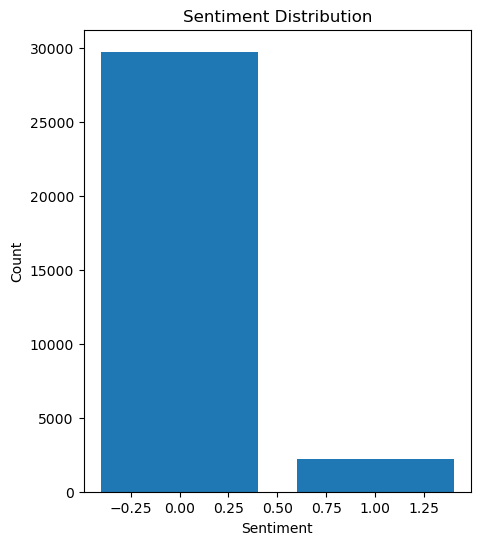

In [17]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(5, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

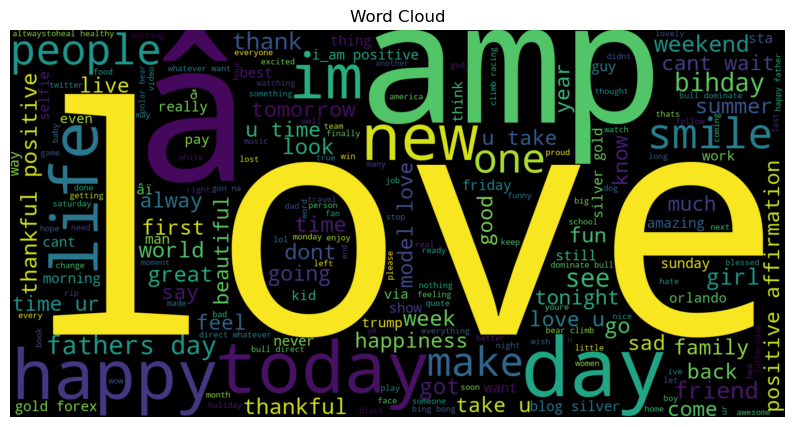

In [18]:
all_text = ' '.join(df['tokenized_text'])
wordcloud = WordCloud(width=1600, height=800, background_color='black').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [19]:
word_freq = Counter(all_text.split())
common_words = word_freq.most_common(20)  # Get the 20 most common words
print('Top 20 Most Common Words:')
for word, freq in common_words:
    print(f'{word}: {freq}')

Top 20 Most Common Words:
love: 2646
day: 2221
â: 1880
happy: 1667
amp: 1584
im: 1138
u: 1137
time: 1118
life: 1090
like: 1042
today: 992
new: 983
positive: 928
get: 918
thankful: 917
people: 852
good: 840
bihday: 832
cant: 799
one: 781


In [20]:
max_words = 10000             
max_sequence_length = 100    

In [21]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['tokenized_text'])
sequences = tokenizer.texts_to_sequences(df['tokenized_text'])
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [22]:
# Check unique values in the 'sentiment_label' column
unique_sentiment_labels = df['label'].unique()
print("Unique Sentiment Labels:", unique_sentiment_labels)

# Check the number of unique classes
num_classes = len(unique_sentiment_labels)
print("Number of Unique Classes:", num_classes)

# One-hot encode the labels
y = to_categorical(df['label'], num_classes=num_classes)


Unique Sentiment Labels: [0 1]
Number of Unique Classes: 2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
rnn_models = [
    ('LSTM', LSTM),
    ('GRU', GRU),
    ('SimpleRNN', SimpleRNN)
]

Training and Evaluating LSTM model...
Epoch 1/5
640/640 [==============================] - 1298s 2s/step - loss: 0.2566 - accuracy: 0.9306 - val_loss: 0.2589 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 1421s 2s/step - loss: 0.2529 - accuracy: 0.9306 - val_loss: 0.2583 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 681s 1s/step - loss: 0.2531 - accuracy: 0.9306 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 880s 1s/step - loss: 0.2530 - accuracy: 0.9306 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 5/5
200/200 [==============================] - 44s 222ms/step - loss: 0.2575 - accuracy: 0.9287
LSTM Test loss: 25.75%
LSTM Test accuracy: 92.87%
LSTM Model Save


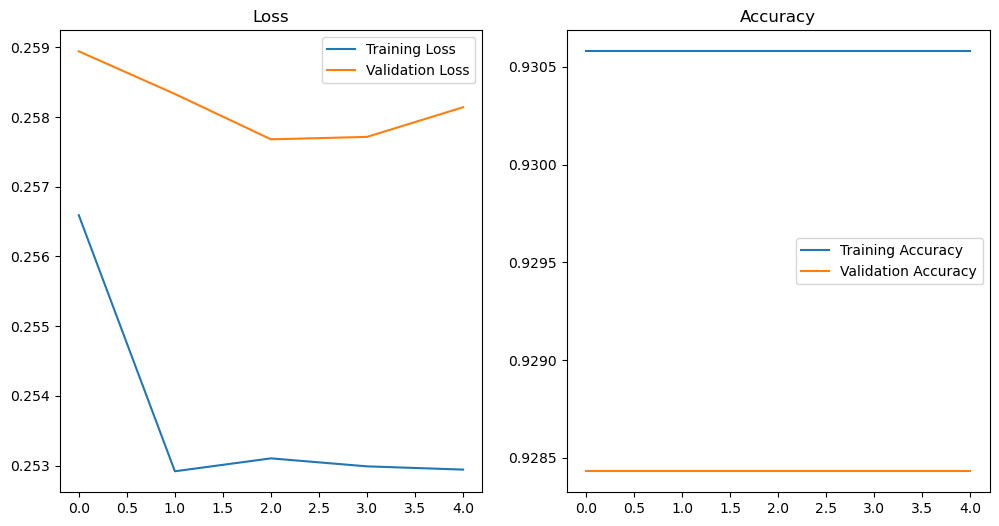


Training and Evaluating GRU model...
Epoch 1/5
640/640 [==============================] - 804s 1s/step - loss: 0.2589 - accuracy: 0.9306 - val_loss: 0.2581 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 628s 981ms/step - loss: 0.2425 - accuracy: 0.9316 - val_loss: 0.1669 - val_accuracy: 0.9474
Epoch 3/5
640/640 [==============================] - 260s 406ms/step - loss: 0.1222 - accuracy: 0.9617 - val_loss: 0.1265 - val_accuracy: 0.9583
Epoch 4/5
640/640 [==============================] - 353s 551ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.1412 - val_accuracy: 0.9546
Epoch 5/5
200/200 [==============================] - 14s 71ms/step - loss: 0.1701 - accuracy: 0.9587
GRU Test loss: 17.01%
GRU Test accuracy: 95.87%
GRU Model Save


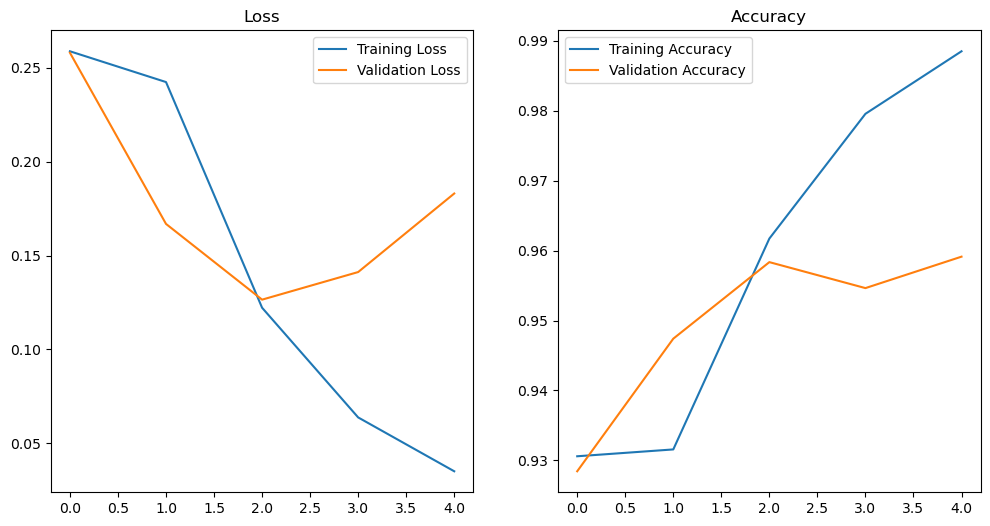


Training and Evaluating SimpleRNN model...
Epoch 1/5
640/640 [==============================] - 91s 139ms/step - loss: 0.2628 - accuracy: 0.9280 - val_loss: 0.2578 - val_accuracy: 0.9284
Epoch 2/5
640/640 [==============================] - 102s 159ms/step - loss: 0.2559 - accuracy: 0.9305 - val_loss: 0.2579 - val_accuracy: 0.9284
Epoch 3/5
640/640 [==============================] - 82s 128ms/step - loss: 0.2558 - accuracy: 0.9302 - val_loss: 0.2577 - val_accuracy: 0.9284
Epoch 4/5
640/640 [==============================] - 88s 137ms/step - loss: 0.2553 - accuracy: 0.9303 - val_loss: 0.2651 - val_accuracy: 0.9284
Epoch 5/5
200/200 [==============================] - 6s 30ms/step - loss: 0.2575 - accuracy: 0.9285
SimpleRNN Test loss: 25.75%
SimpleRNN Test accuracy: 92.85%
SimpleRNN Model Save


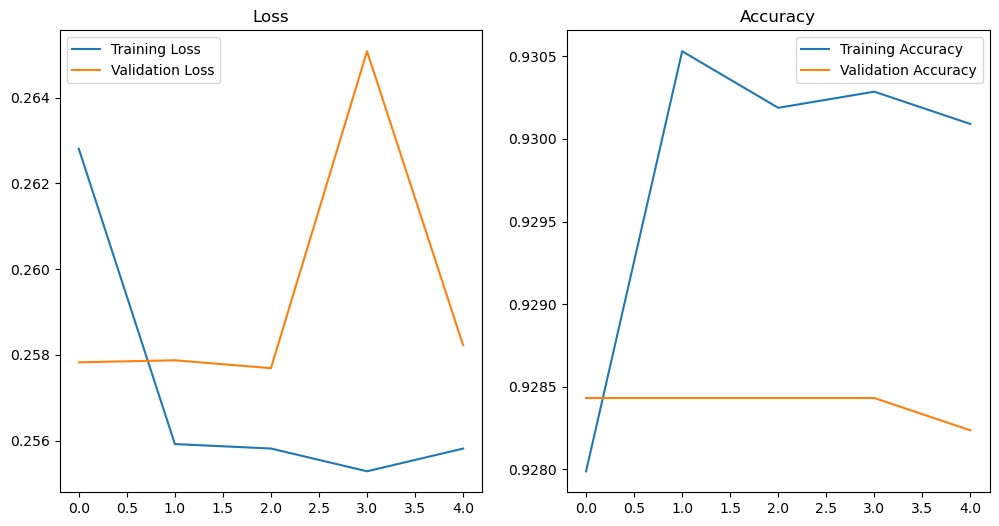

In [25]:
for rnn_name, rnn_layer in rnn_models:
  print(f"Training and Evaluating {rnn_name} model...")

  # Build the RNN model
  model = Sequential()
  model.add(Embedding(input_dim = max_words, output_dim = 128, input_length = max_sequence_length))
  model.add(rnn_layer(256, dropout = 0.2, recurrent_dropout = 0.2))
  model.add(Dense(num_classes, activation = 'softmax'))

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'{rnn_name} Test loss: {loss * 100:.2f}%')
  print(f'{rnn_name} Test accuracy: {accuracy * 100:.2f}%')

  # Save the model
  model.save(f"sentiment_analysis_model_{rnn_name}.h5")
  print(f"{rnn_name} Model Save")

  # Plot training history
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy')
  plt.legend()
  plt.show()

  print()